# Instructions {-}

1. Download the provided jupyter notebook file to your computer.
2. Write all your answers and code into this notebook file.
3. When your work is completed, export your notebook to an HTML file.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.



## Identification {-}

### Your Information {-}

Your Last Name:
Latrofa

Your First Name:
Ania

### Group Members (list any classmates you worked with on this problem set) {-}

Your Group Members:
Saad, Alina

# Problem 1 - Peruvian Presidential Election[^1] {-}

[^1]: Problem 1 was originally designed in collaboration with Dan Levy.

On April 11, 2021, Peru voted in its presidential election with 18 candidates in the fray. The elections were held in the backdrop of a high pandemic death toll and severe political uncertainty – Peru had one of the world’s highest COVID death rates and saw three presidents within the span of a week in 2020. 

The top two candidates from the first round of voting were left-wing teacher’s union leader Pedro Castillo and right-wing former Congresswoman and former first lady Keiko Fujimori. They fought in a highly contested and polarized run-off election held on June 6, 2021. The election was extremely close, with Castillo leading the run-off vote by a mere 44,000 votes out of nearly 19 million votes cast. Fujimori refused to concede the election and leveled allegations of voting fraud. 

After a long delay during which the election tribunal investigated and dismissed all of Fujimori’s appeals, Pedro Castillo was declared as the winner on July 19, 2021. Keiko Fujimori finally conceded the election, losing with a vote share of 49.87% vs Castillo’s 50.13%.

This question asks you to use actual data from the election to help you internalize some key statistical inference concepts and ideas. The workbook “Peru Election 2020.csv” contains the actual data of the presidential second round from all voting tables in the Peruvian election.[^2] Assume our population of interest comprises all voting tables in this election. 

This exercise will ask you to draw random samples from this population using python.



[^2]: In Peru, electors are divided into voting tables (_mesas electorales_) with each voting table representing 200-250 people.

## 1-A {-}

Import the data into python. Now browse the data just to get a feel for it. In 2-3 sentences, describe how the data are organized. 

In [4]:
# Standard packages
import pandas as pd
# Numpy for numerical calculations
import numpy as np
import random
# Additional packages used for plotting and saving images
# Note plotnine is another library with ggplot functionality similar to lets-plot
# You may use any plotting package
from plotnine import *
from IPython.display import Image
import matplotlib.pyplot as plt

In [6]:
# Reading in the data
peru = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W3 Peru Election 2020.csv')

In [7]:
# Your exploratory code here
peru.head(20)

,voting_table_id,castillo,fujimori,invalid,votes_cast
0,1,115.0,87.0,18,220.0
1,2,71.0,58.0,15,144.0
2,3,71.0,50.0,8,129.0
3,4,66.0,105.0,31,202.0
4,5,125.0,87.0,16,228.0
5,6,112.0,51.0,8,171.0
6,7,90.0,101.0,29,220.0
7,8,93.0,34.0,11,138.0
8,9,113.0,54.0,11,178.0
9,10,116.0,58.0,11,185.0


In [8]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86488 entries, 0 to 86487
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   voting_table_id  86488 non-null  int64  
 1   castillo         86237 non-null  float64
 2   fujimori         86184 non-null  float64
 3   invalid          86488 non-null  int64  
 4   votes_cast       86482 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.3 MB


In [9]:
peru.shape

(86488, 5)

In [10]:
peru.describe()

,voting_table_id,castillo,fujimori,invalid,votes_cast
count,86488.000000,86237.000000,86184.000000,86488.000000,86482.000000
mean,43244.500000,102.461472,102.011162,14.211428,218.043269
std,24967.079378,46.828410,50.854092,13.657631,42.927405
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21622.750000,70.000000,61.000000,9.000000,204.000000
50%,43244.500000,96.000000,108.000000,13.000000,230.000000
75%,64866.250000,128.000000,143.000000,17.000000,246.000000
max,86488.000000,269.000000,271.000000,300.000000,300.000000


_Your answer here:_

The data is organized in a table, with all the votes cast (per each candidate and the invalid ones). Even if all the values are integers, some of them are saved as floats. Some values are missing in the three columns with float variables: "castillo" is missing around 250 variables, "Fujimori" around 300, "votes_cast" is missing only 6.

## 1-B {-}

Based on the population (_i.e._ the whole data set), calculate Castillo’s win margin, the difference in proportion of votes between Castillo and Fujimori in the population. In other words, the difference between Castillo’s and Fujimori’s votes over the total votes cast.  This is the population parameter of interest. 

In [11]:
# Your code here:

peru['castillo'] = peru['castillo'].fillna(0).astype(int)
peru['fujimori'] = peru['fujimori'].fillna(0).astype(int)
peru['votes_cast'] = peru['votes_cast'].fillna(0).astype(int)

votes_castillo = peru['castillo'].sum()
votes_fujimori = peru['fujimori'].sum()
win_margin = (votes_castillo-votes_fujimori) / peru['votes_cast'].sum()

print(f"Castillo's win margin is of {win_margin*100:.3f}%, as a percentage of the votes cast.")

Castillo's win margin is of 0.235%, as a percentage of the votes cast.


## 1-C {-}

Now draw a random sample of 5 voting tables. Look at this sample and imagine you were going to use this sample to decide who won the election based on the following steps:

1. Estimate the difference in proportion of votes between Castillo and Fujimori _in this sample_
2. Who won the election according to this sample? Is this what you would expect?

Assuming your data is saved in a variable named `peru`, you can use the following code to generate a random sample of `5` rows from the `DataFrame`. The `random_state` argument sets the seed for random number generation to make your code replicable with the results other classmates may have.

```python
peru.sample(n=5, random_state=422)
```



In [12]:
# Your code here:
samp_5 = peru.sample(n=5, random_state=422)

sample1_votes_castillo = samp_5['castillo'].sum()
sample1_votes_fujimori = samp_5['fujimori'].sum()
sample1_win_margin = (sample1_votes_fujimori-sample1_votes_castillo) / samp_5['votes_cast'].sum()

print(f"In the sample, Fujimori's win margin is of {sample1_win_margin*100:.3f}%, based on the 5 random rows picked.")

In the sample, Fujimori's win margin is of 1.708%, based on the 5 random rows picked.


_Your answer here:_

Based on the above sample of 5 voting tables, Fujimori won with a margin of 1.708%, which is a result that I did not expect with absolute certainty, but I was aware that either one of them could win in this scenario, due to the fact that in many tables the number of votes they have received are quite close.
Nonetheless, the most reasonable expectation is that Castillo should have won in the sample, due to the fact that he won the overall election. This demonstrates that, with such a small sample (only 5 tables out of thousands), the sample result can differ a lot from the real population result.

An explanation of this situation could be that, although Castillo had a higher average vote count across all voting tables, Fujimori had higher variability (standard deviation) in her results, which means that in some individual tables Fujimori received more votes than Castillo, even though she lost the overall election. Our random sample of 5 tables must therefore include more Fujimori-favorable tables than Castillo-favorable ones.

## 1-D {-}

Now draw a random sample of 100 voting tables. Look at this sample and imagine you were going to use this sample to decide who won the election based on the following steps:

1. Estimate the difference in proportion of votes between Castillo and Fujimori _in this sample_
2. Who won the election according to this sample? Is this what you would expect?

```python
peru.sample(n=100, random_state=407)
```


In [13]:
# Your code here:

samp_100 = peru.sample(n=100, random_state=407)

sample2_votes_castillo = samp_100['castillo'].sum()
sample2_votes_fujimori = samp_100['fujimori'].sum()
sample2_win_margin = (sample2_votes_fujimori-sample2_votes_castillo) / samp_100['votes_cast'].sum()

print(f"In the sample, Fujimori's win margin is of {sample2_win_margin*100:.3f}%, based on the 100 random rows picked.")

In the sample, Fujimori's win margin is of 8.395%, based on the 100 random rows picked.


_Your answer here:_

Once again, according to the sample chosen, Fujimori won. In this case, we based our estimations on a sample of 100 tables and the margin of victory is approximately 8%, which is much higher than in the previous sample of 5 tables. One might expect that with a larger sample size (100 compared to 5), the sample result would be closer to the true population result where Castillo won. However, this sample still shows Fujimori winning, which can be explained by the important principle that unbiasedness does not guarantee accuracy in any sample. 
This particular sample happened to include a relevant majority of Fujimori-favorable voting tables, leading once again to misleading results.

## 1-E {-}

Now compare your estimate based on the sample of size `5` with your estimate based on the sample of size `100`. Which of the estimates is closest to the population parameter of interest? Is this what you would expect?

_Your answer here:_

The estimate based on the sample of size 5 is closer to the population parameter of interest, compared to the sample of size 100. Although both samples incorrectly predict Fujimori as the winner, the margin of victory in the n=5 sample is smaller and closer to the actual vote difference than in the case of n=100 sample. Surprisingly, this is not what I expected, because the n=100 sample shows Fujimori winning by an even larger margin (8%) than in the smaller sample, moving further away from the true result.

I would expect larger samples to provide more accurate estimates due to the Law of Large Numbers. Even if larger samples are more reliable on average, this specific sample (random state = 407) is unrepresentative.
My guess is that, if we repeated this sampling process multiple times, the n=100 samples would be closer to the true value than the n=5 samples.

## 1-F Many Samples of Size 5 {-}

Now conduct `1,000` simulations for random samples of `5` voting tables each. For each simulation, draw a sample and calculate the difference in the proportions of votes received by the two candidates. One way to run this simulation is by using a `for` loop to store the results of your different samples. 

Calculate and report the average and standard deviation of these differences in proportions obtained from the simulations. 

Be sure to save the results of this simulation as you will need it for future parts of this question.

Note, within your `for` loop, you __should not__ be calling the same `random_state` within the loop as that will result in you always drawing the same sample of `5` voting tables. You may omit the `random_state` argument for this part of the problem.

In [14]:
np.random.seed(422)
# Set the number of simulations
n_sim = 10**3
# Create an empty list to store values
xbar_5 = []

for _ in range(n_sim):    
    samp_5_loop = peru.sample(n=5)        
    samp5_loop_castillo = samp_5_loop['castillo'].sum()
    samp5_loop_fujimori = samp_5_loop['fujimori'].sum()
    samp5_loop_margin = (samp5_loop_castillo - samp5_loop_fujimori) / samp_5_loop['votes_cast'].sum()
    xbar_5.append(samp5_loop_margin)

samp_5_loop_df = pd.DataFrame({'simulation results': xbar_5})
average_simulations5 = samp_5_loop_df['simulation results'].mean()
std_simulations5 = samp_5_loop_df['simulation results'].std()

print(f"Average of Castillo's win margin: {average_simulations5*100:.3f}%; standard deviation of Castillo's win margin: {std_simulations5*100:.3f}%.")

Average of Castillo's win margin: 0.748%; standard deviation of Castillo's win margin: 18.036%.


## 1-G Many Samples of Size 100 {-}

Now conduct `1,000` simulations for random samples of `100` voting tables each. For each simulation, draw a sample and calculate the difference in the proportions of votes received by the two candidates. One way to run this simulation is by using a `for` loop to store the results of your different samples. Calculate and report the average and standard deviation of these differences in proportions from the simulations. 

Be sure to save the results of this simulation as you will need it for future parts of this question.

Note, within your `for` loop, you __should not__ be calling the same `random_state` within the loop.

In [16]:
# Set the number of simulations
n_sim = 10**3
# Create an empty list to store values
xbar_100 = []

for _ in range(n_sim):    
    samp_100_loop = peru.sample(n=100)      
    samp100_loop_castillo = samp_100_loop['castillo'].sum()
    samp100_loop_fujimori = samp_100_loop['fujimori'].sum()
    samp100_loop_margin = (samp100_loop_castillo - samp100_loop_fujimori) / samp_100_loop['votes_cast'].sum()
    xbar_100.append(samp100_loop_margin)

samp_100_loop_df = pd.DataFrame({'simulation results': xbar_100})
average_simulations = samp_100_loop_df['simulation results'].mean()
std_simulations = samp_100_loop_df['simulation results'].std()

print(f"Average of Castillo's win margin: {average_simulations*100:.3f}%; standard deviation of Castillo's win margin: {std_simulations*100:.3f}%.")

Average of Castillo's win margin: 0.265%; standard deviation of Castillo's win margin: 3.990%.


## 1-H Plotting Your Simulations {-}

Construct a relative frequency histogram (_i.e._ show proportions on the y-axis, instead of counts) of the average differences in proportions for samples of size `5` and for samples of size `100`. Draw these histograms in a way that they are easy to compare visually. How does the shape of the distribution of average differences in proportions change as the sample size increases (from `5` to `100`)?

Hint: you may find it useful to store your above simulations in a pandas `DataFrame` for this plotting. If you followed the naming conventions in the starting code above, you can create this `DataFrame` with the following code:

```python
peru_sims = pd.DataFrame({'5': xbar_5,'100': xbar_100})
```

This code will store the data in a variable named `peru_sims` with column names `5` and `100` corresponding to the different sample sizes. This data is in a [wide format](https://pandas.pydata.org/docs/user_guide/reshaping.html), with multiple columns storing information from the separate simulations. If you prefer, you could instead save it in a long format with a separate column indicating if a simulation corresponds to a sample size of `5` or `100`. Depending on how you approach making your plot, one of these formats (wide or long) may be easier.

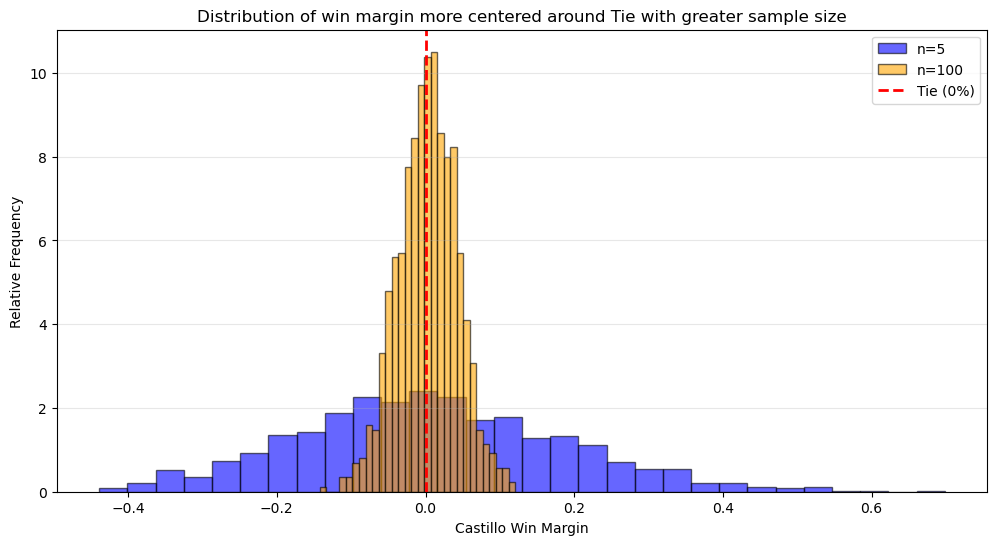

In [17]:
# Your code here:
peru_sims = pd.DataFrame({'5':xbar_5,'100':xbar_100})

plt.figure(figsize=(12, 6))
plt.hist(peru_sims['5'], bins=30, alpha=0.6, label='n=5', 
         edgecolor='black', color='blue', density=True)
plt.hist(peru_sims['100'], bins=30, alpha=0.6, label='n=100', 
         edgecolor='black', color='orange', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Tie (0%)')
plt.xlabel('Castillo Win Margin')
plt.ylabel('Relative Frequency')
plt.title("Distribution of win margin more centered around Tie with greater sample size")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.savefig("W3 Perù win margin distribs", dpi=300) 
plt.show()

_Your answer here:_

As the sample size increases from `5` to `100`, the shape of the distribution of average differences in proportions becomes narrower and more concentrated, in fact the larger sample's distribution (in orange) is much tighter and peaked compared to the smaller sample's distribution (in blue), which is wider and more spread out. Both distributions appear to be centered near the tie line (`0`%), nonetheless the small sample shows greater variability.

This demonstrates that increasing sample size reduces sampling variability, making estimates more precise and reliable. The fact that both distributions are centered near zero (the tie) suggests that in the true population, the election was very close, with results nearly split in half between the candidates.

## 1-I Comparing Means {-}

Compare the __averages__ you calculated earlier from the simulations (_i.e._ the one based on estimates of size 5 vs the one based on estimates of size 100). Are these averages close to the population parameter of interest? Which of these averages is closest to the population parameter of interest? Is this what you would expect?

In [114]:
pop_margin = (peru['castillo'].sum() - peru['fujimori'].sum()) / peru['votes_cast'].sum()
print(f"The averages of the two simulations are: {samp_5_loop_df['simulation results'].mean():.5f} for the sample of 5, and {samp_100_loop_df['simulation results'].mean():.5f} for the sample of 100. \nThe population parameter is {pop_margin:.5f}")

The averages of the two simulations are: 0.00748 for the sample of 5, and 0.00265 for the sample of 100. 
The population parameter is 0.00235


_Your answer here:_

The bigger sample has an average much closer to the real one (which is around `0.00235`), and this is what I would expect: as the sample size increases, the average obtained is much closer to the true parameter, that of the population.

## 1-J Comparing Standard Deviations {-}

Now compare the __standard deviations__ (i.e., the one based on estimates of size 5 vs the one based on estimates of size 100). 

1. Which of these standard deviations is highest? Is this what you would expect?
2. Are these standard deviations higher than, lower than, or approximately the same as the standard deviation of the differences in proportion of votes between the two candidates based on the whole population of voting tables? (For the whole population, consider the standard deviation in the difference in vote shares reported across all the voting tables.)

In [115]:
pop_std = ((peru['castillo']- peru['fujimori']) / peru['votes_cast']).std()
print(f"The standard deviations of the two simulations are: {samp_5_loop_df['simulation results'].std():.5f} for the sample of 5, and {samp_100_loop_df['simulation results'].std():.5f} for the sample of 100. \nThe population parameter is {pop_std:.5f}")

The standard deviations of the two simulations are: 0.18036 for the sample of 5, and 0.03990 for the sample of 100. 
The population parameter is 0.41072


_Your answer here_

Both simulated standard deviations (`0.18036` and `0.03990`) are lower than the population standard deviation, which is `0.41037`.
The sampling distributions have lower variability than the population distribution.

Even if I did not expect this result initially, it may be due to the fact that sampling distributions (being distributions of sample means) tend to be less variable than the actual population. Averaging values together reduces variability, while in the population there may be more extreme observations.

The population standard deviation reflects the actual variability in voting margins across all voting tables, while the simulated standard deviations capture the variability of estimates.

## 1-K Determining the Winner in Different Simulations {-}

Take your estimates based on samples of size 5 and those based on size 100, and calculate the following:

1. Proportion of samples of size 5 in which Castillo won the election (i.e. proportion of samples of size 5 in which Castillo’s win margin is greater than zero).
2. Proportion of samples of size 100 in which Castillo won the election.
3. Which of the two numbers reported just above is larger? Is this what you would expect? What does your answer to this question imply about the reliability of samples of size 5 vs samples of size 100?

In [116]:
prop_castillo_wins_5 = (samp_5_loop_df['simulation results'] > 0).sum() / len(samp_5_loop_df)
prop_castillo_wins_100 = (samp_100_loop_df['simulation results'] > 0).sum() / len(samp_100_loop_df)

print(f"Proportion of samples of size 5 in which Castillo wins the election: {prop_castillo_wins_5*100:.2f}%")
print(f"Proportion of samples of size 100 in which Castillo wins the election: {prop_castillo_wins_100*100:.2f}%")

Proportion of samples of size 5 in which Castillo wins the election: 49.70%
Proportion of samples of size 100 in which Castillo wins the election: 53.10%


_Your answer here:_

The proportion of the sample of size 100 is greater than the proportion of the sample of size 5, as I expected, because the greater sample is more reliable and provides more accurate estimates of the true population parameters.

This is due to the greater reliability of larger samples: the Central Limit Theorem states that, as sample size increases, the sampling distribution becomes more concentrated around the true parameter.

## 1-L Defining Values From This Problem {-}

Based on the above exercise comparing vote totals, indicate:

1. Population parameter of interest (what it is and what value it takes)
2. Estimator (define it conceptually for this exercise)
3. Estimates (indicate in words what they are for this specific exercise)

_Your answer here:_

1. Population parameter of interest: the win margin in favor of Castillo, Mean = `0.00235`, Standard Deviation = `0.41037`;
2. Estimator: the sample mean win margin, calculated as $((Castillo votes)+(Fujimori votes)) / (Votes cast)$ both for the sample of size `5` and for the one of size `100`;
3. Estimates:
    - for the sample of size `5`: Mean = `0.00748`, Standard Error = `0.18036`,
    - for the sample of size `100`, Mean = `0.00265`, Standard Error = `0.03990`.

## 1-M {-}

What do you think was the purpose of this exercise? [max.1 paragraph]

_Your answer here:_

I think the purpose of this exercise was to practice fundamental statistical concepts and to understand first-hand how sampling works. Most importantly, it was to show that, even with the right methodology, individual samples can lead to misleading results. A bigger sample does not necessarily mean a perfect result (not in any single case, anyways), but on average it provides more consistent and accurate estimates, especially over numerous reiterations.

My key takeaway is that, even if larger samples are superior, I should not treat any single sample as correct or universally true.

# Problem 2 - Central Limit Practice {-}

Consider a sample of 100 companies from the list of Fortune 1000 companies. We are interested in what possible values our sample mean for company revenues could take on. We know the following facts about the population:

1. The population average revenue is \$13.9 billion
2. The population standard deviation of the revenues is \$26.7 billion

Throughout this problem, consider using your sample mean as an estimator for the true population mean.


## 2-0 {-}

Run the following code to load in the `norm` function from the `scipy` library, which can be used to draw samples from a normal distribution or calculate associated values.

```python
from scipy.stats import norm
```

If you have not installed the `scipy` library you can do so by running the following code:

```python
pip install scipy
```

In [117]:
from scipy.stats import norm

## 2-A {-}

Calculate the standard deviation of your estimator.

In [118]:
# Your calculation here

population_avg = 13.9
population_std = 26.7
estimator_std = 26.7/np.sqrt(100)
print(f"The Standard Deviation of the Sample is {estimator_std}")

The Standard Deviation of the Sample is 2.67


## 2-B {-}

What is the probability the mean revenue in your sample exceeds \$15 billion? Exceeds \$20 billion?

Hint: the `norm.cdf()` function will calculate the cumulative distribution function for a normal distribution. This calculates the probability of obtaining a value __at or below__ the value you provide. The `norm.cdf()` function allows you to specify the mean (location) using the `loc` argument and the standard deviation (scale) using the `scale` argument. Equivalently, you could provide a standardized value as the initial argument in this function.



In [119]:
# Exceeds 15 Billion

prob_above15 = 1 - norm.cdf(15, loc=population_avg, scale=estimator_std)
print(f"The probability that the mean revenue in the sample exceeds $15 billion is {prob_above15*100:.2f}%")

The probability that the mean revenue in the sample exceeds $15 billion is 34.02%


In [120]:
# Exceeds 20 Billion

prob_above20 = 1 - norm.cdf(20, loc=population_avg, scale=estimator_std)
print(f"The probability that the mean revenue in the sample exceeds $20 billion is {prob_above20*100:.2f}%")

The probability that the mean revenue in the sample exceeds $20 billion is 1.12%


## 2-C {-}

What is the probability the mean revenue in your sample is between \$12 billion and \$16 billion?

In [121]:
# Your calculation here:

prob_12_16 = norm.cdf(16, loc=population_avg, scale=estimator_std) - norm.cdf(12, loc=population_avg, scale=estimator_std)
print(f"The probability that the mean revenue in the sample is between $12 billion and $16 billion is {prob_12_16*100:.2f}%")

The probability that the mean revenue in the sample is between $12 billion and $16 billion is 54.59%


## 2-D {-}

What is the smallest interval that we would expect our sample mean to fall into 95\% of the time?

In [122]:
# Your calculation here

lower_bound = norm.ppf(0.025, loc=population_avg, scale=estimator_std)
upper_bound = norm.ppf(0.975, loc=population_avg, scale=estimator_std)
print(f"The smallest interval that we would expect our sample mean to fall into 95% of the time is: {lower_bound:.3f}, {upper_bound:.3f}")

The smallest interval that we would expect our sample mean to fall into 95% of the time is: 8.667, 19.133


# Problem 3 - Sample Mean and Sample Median {-}

This question asks you to continue to explore properties of different estimators. Consider taking a sample from an Exponential distribution with rate parameter $\lambda = 1$. An Exponential distribution is a continuous random variable that is similar to the Poisson distribution and is often used to measure waiting times. The probability density function for an Exponential distribution for $x\geq0$ is given by:

$$f(x) = \lambda e^{-\lambda x}$$

And the cumulative distribution function is given by:

$$P(X\leq a) = 1-e^{-\lambda x}$$

For $\lambda = 1$, the theoretical mean of this distribution is $1$ and the theoretical median is $\approx 0.69$.

This question asks you to imagine we did not know these theoretical values and you instead wanted to estimate them using the sample mean and sample median. I have provided some code to execute the loops, but you will need to calculate the final summary values.

## 3-A Sample of Size 5 {-}

Simulate drawing a sample of size `5` from an Exponential distribution for `100` simulations. For each sample, calculate the sample mean and sample median and store these values.

You can use the following code to load the `expon` function:

```python
from scipy.stats import expon
```

And once this function is loaded, the following code will generate a random sample of `5` draws from this distribution.

```python
expon.rvs(size=5)
```

You can use the `np.median()` and `np.mean()` functions in the `numpy` package to calculate the mean / median.

After running your simulation, calculate the average value for your stored mean and median calculations. Report these averages and compare them to the theoretical quantities defined above. Do your values match the theoretical values?

In [123]:
# Loading the required function
from scipy.stats import expon

In [124]:
n_sim = 10**2

expon_mean_5 = []
expon_median_5 = []

for _ in range(n_sim):
    expon_loop = expon.rvs(size=5)
    expon_mean_5.append(expon_loop.mean())
    expon_median_5.append(np.median(expon_loop))
    

In [125]:
# Calculate the mean of the simulated sample means

mean_means = np.mean(expon_mean_5)
print(f'The mean of the simulated sample means is: {mean_means:.3f}')

The mean of the simulated sample means is: 1.013


In [126]:
# Calculate the mean of the simulated sample medians

mean_medians = np.mean(expon_median_5)
print(f'The mean of the simulated sample medians is: {mean_medians:.3f}')

The mean of the simulated sample medians is: 0.763


The values obtained do not match completely the ones above, but they are quite close to them:
- The Mean of Means we obtained is `0.987`, which is slightly below the value of `1`;
- The Mean of Medians we obtained is `0.73`, which is slightly above the value of `0.69`.
Even if there is a difference, it is not very big, as the values we obtained are supposed to converge to the real ones (`1` and `0.69`)

## 3-B Increasing Your Simulation Size {-}

Your results from the above problem may not have exactly matched the true theoretical quantities. This could be driven by sampling variation from not having enough simulations. Keeping the size of your random draws fixed at `5`, increase the number of simulations you run to `10,000`. Report the average (across simulations) for your sample median and sample mean and compare these to the theoretical quantities.

In [127]:
n_sim = 10**4

expon_mean2 = []
expon_median2 = []

for _ in range(n_sim):
    expon_loop = expon.rvs(size=5)
    expon_mean2.append(expon_loop.mean())
    expon_median2.append(np.median(expon_loop))

In [128]:
# Calculate the mean of the simulated sample means

mean_means2 = np.mean(expon_mean2)
print(f'The mean of the simulated sample means is: {mean_means2:.3f}')

The mean of the simulated sample means is: 0.995


In [129]:
# Calculate the mean of the simulated sample medians

mean_medians2 = np.mean(expon_median2)
print(f'The mean of the simulated sample medians is: {mean_medians2:.3f}')

The mean of the simulated sample medians is: 0.783


This time, there are noticeable changes in the values obtained:
- The Mean of Means we obtained is `0.995`, which is very close to the true value of `1`;
- The Mean of Medians we obtained is `0.783`, which almost 10 percentage points above the true value of `0.69`.

## 3-C Summarizing Your Findings {-}

Your above simulations considered a relatively small sample size of `5` per simulation. Based on these simulations, which estimators (mean and/or median) appear to be unbiased for their respective true population parameters of interest for this type or random variable (Exponential)? Explain your reasoning.

_Your answer here:_

The Mean appears to be unbiased because, as we increase the number of repetitions, the value gets much closer to the true value (`1`). Instead, the Median moves further away from the true value (`0.69`), as the number of repetitions increases.

From our scenario, we can deduct that, for the Exponential random variable, it is best to use the Mean and not the Median as an Estimator (in case we want our estimator to be unbiased).

# Problem 4 - PP422 Claude Project Space {-}

I have created a version of a Claude project [PP422 - 2025/26 AT](https://claude.ai/project/0199df74-d84f-747b-a8e9-59a9f7ffeb69) and I have invited everyone in the class to have access to this project space.

A project workspace in general allows you (and collaborators) to upload files, giving AI models access to these files as context when forming its answers. 

For the above PP422 workspace, I have uploaded copies of my course syllabus, my lecture notes for the first 3 weeks and the solutions for Problem Set 1 and Problem Set 2.

## 4-A Your Review of Early Concepts {-}

Looking back at the content and problem sets from the first 3 weeks of term, identify at least one problem or topic you would like to review or gain more practice with.

Working from the shared Claude project space above, ask Claude to help assist with any questions you may have. Some samples of prompts you may use are:

-   Create study flashcards
-   Visualize key concepts
-   Build a comprehensive study guide

You may also ask Claude directly to build an [Artifact](https://www.anthropic.com/news/build-artifacts) to help clarify these concepts. 

Record which concept(s) you asked for additional review help on in the field below.

_Write your review topic here:_

## 4-B Sharing Any Claude Output You Found Particularly Helpful OPTIONAL {-}

I am curious about any prompts or outputs from this project space you found particularly helpful __or__ unhelpful. 

If you have examples you wish to share, you may email them to me or post them for your classmates to learn from at the [discussion board](https://moodle.lse.ac.uk/mod/board/view.php?id=1873334) posted on Week 3 of the Moodle page.



# Problem 5 - Confidence Intervals - OPTIONAL {-}

## 5-A {-}

This question asks you to approximate confidence intervals from your previous simulation for Peru. Returning to your simulations from a sample of `100` voting tables, calculate the standard deviation of your 1,000 estimates. Use this standard deviation as an estimate for the standard error for your confidence intervals.[^3]

Applying this common standard error, calculate and store a $90\%$ confidence interval for __each__ of your 1000 simulated point estimates. Calculate and report how many of these intervals contain the population parameter of interest. Is this what you would expect?

[^3]: Note, this number is not technically speaking the standard deviation of the sampling distribution, but it will be a reasonable approximation in this case.

In [ ]:
# Calculate and store the standard error estimate

The Standard Error Estimate is: 0.0399


In [ ]:
# Calculate and store the confidence interval lower and upper bounds

Intervalli che contengono il parametro: 910/1000 (91.0%)


## 5-B {-}

How would the number you reported above in part 5-A change under the following scenarios? There is no need to run any additional code, but you should instead try to think about and answer the problem conceptually.

1. You did the same exercise but for __samples of size 1000__
2. You did the same exercise but instead calculated $95\%$ confidence intervals (instead of $90\%$)

## 5-C {-}

Looking at a random sample of 40 simulated confidence intervals from part 5-A above, replicate the following plot.

As in the case of all plot replication exercises, do not feel a need to match the image exactly, but try to capture the main message of the plot. Think in terms of layers of individual elements you would wish to plot or modify. Note, due to randomness in the simulations, your values and intervals may not perfectly match what is presented below.

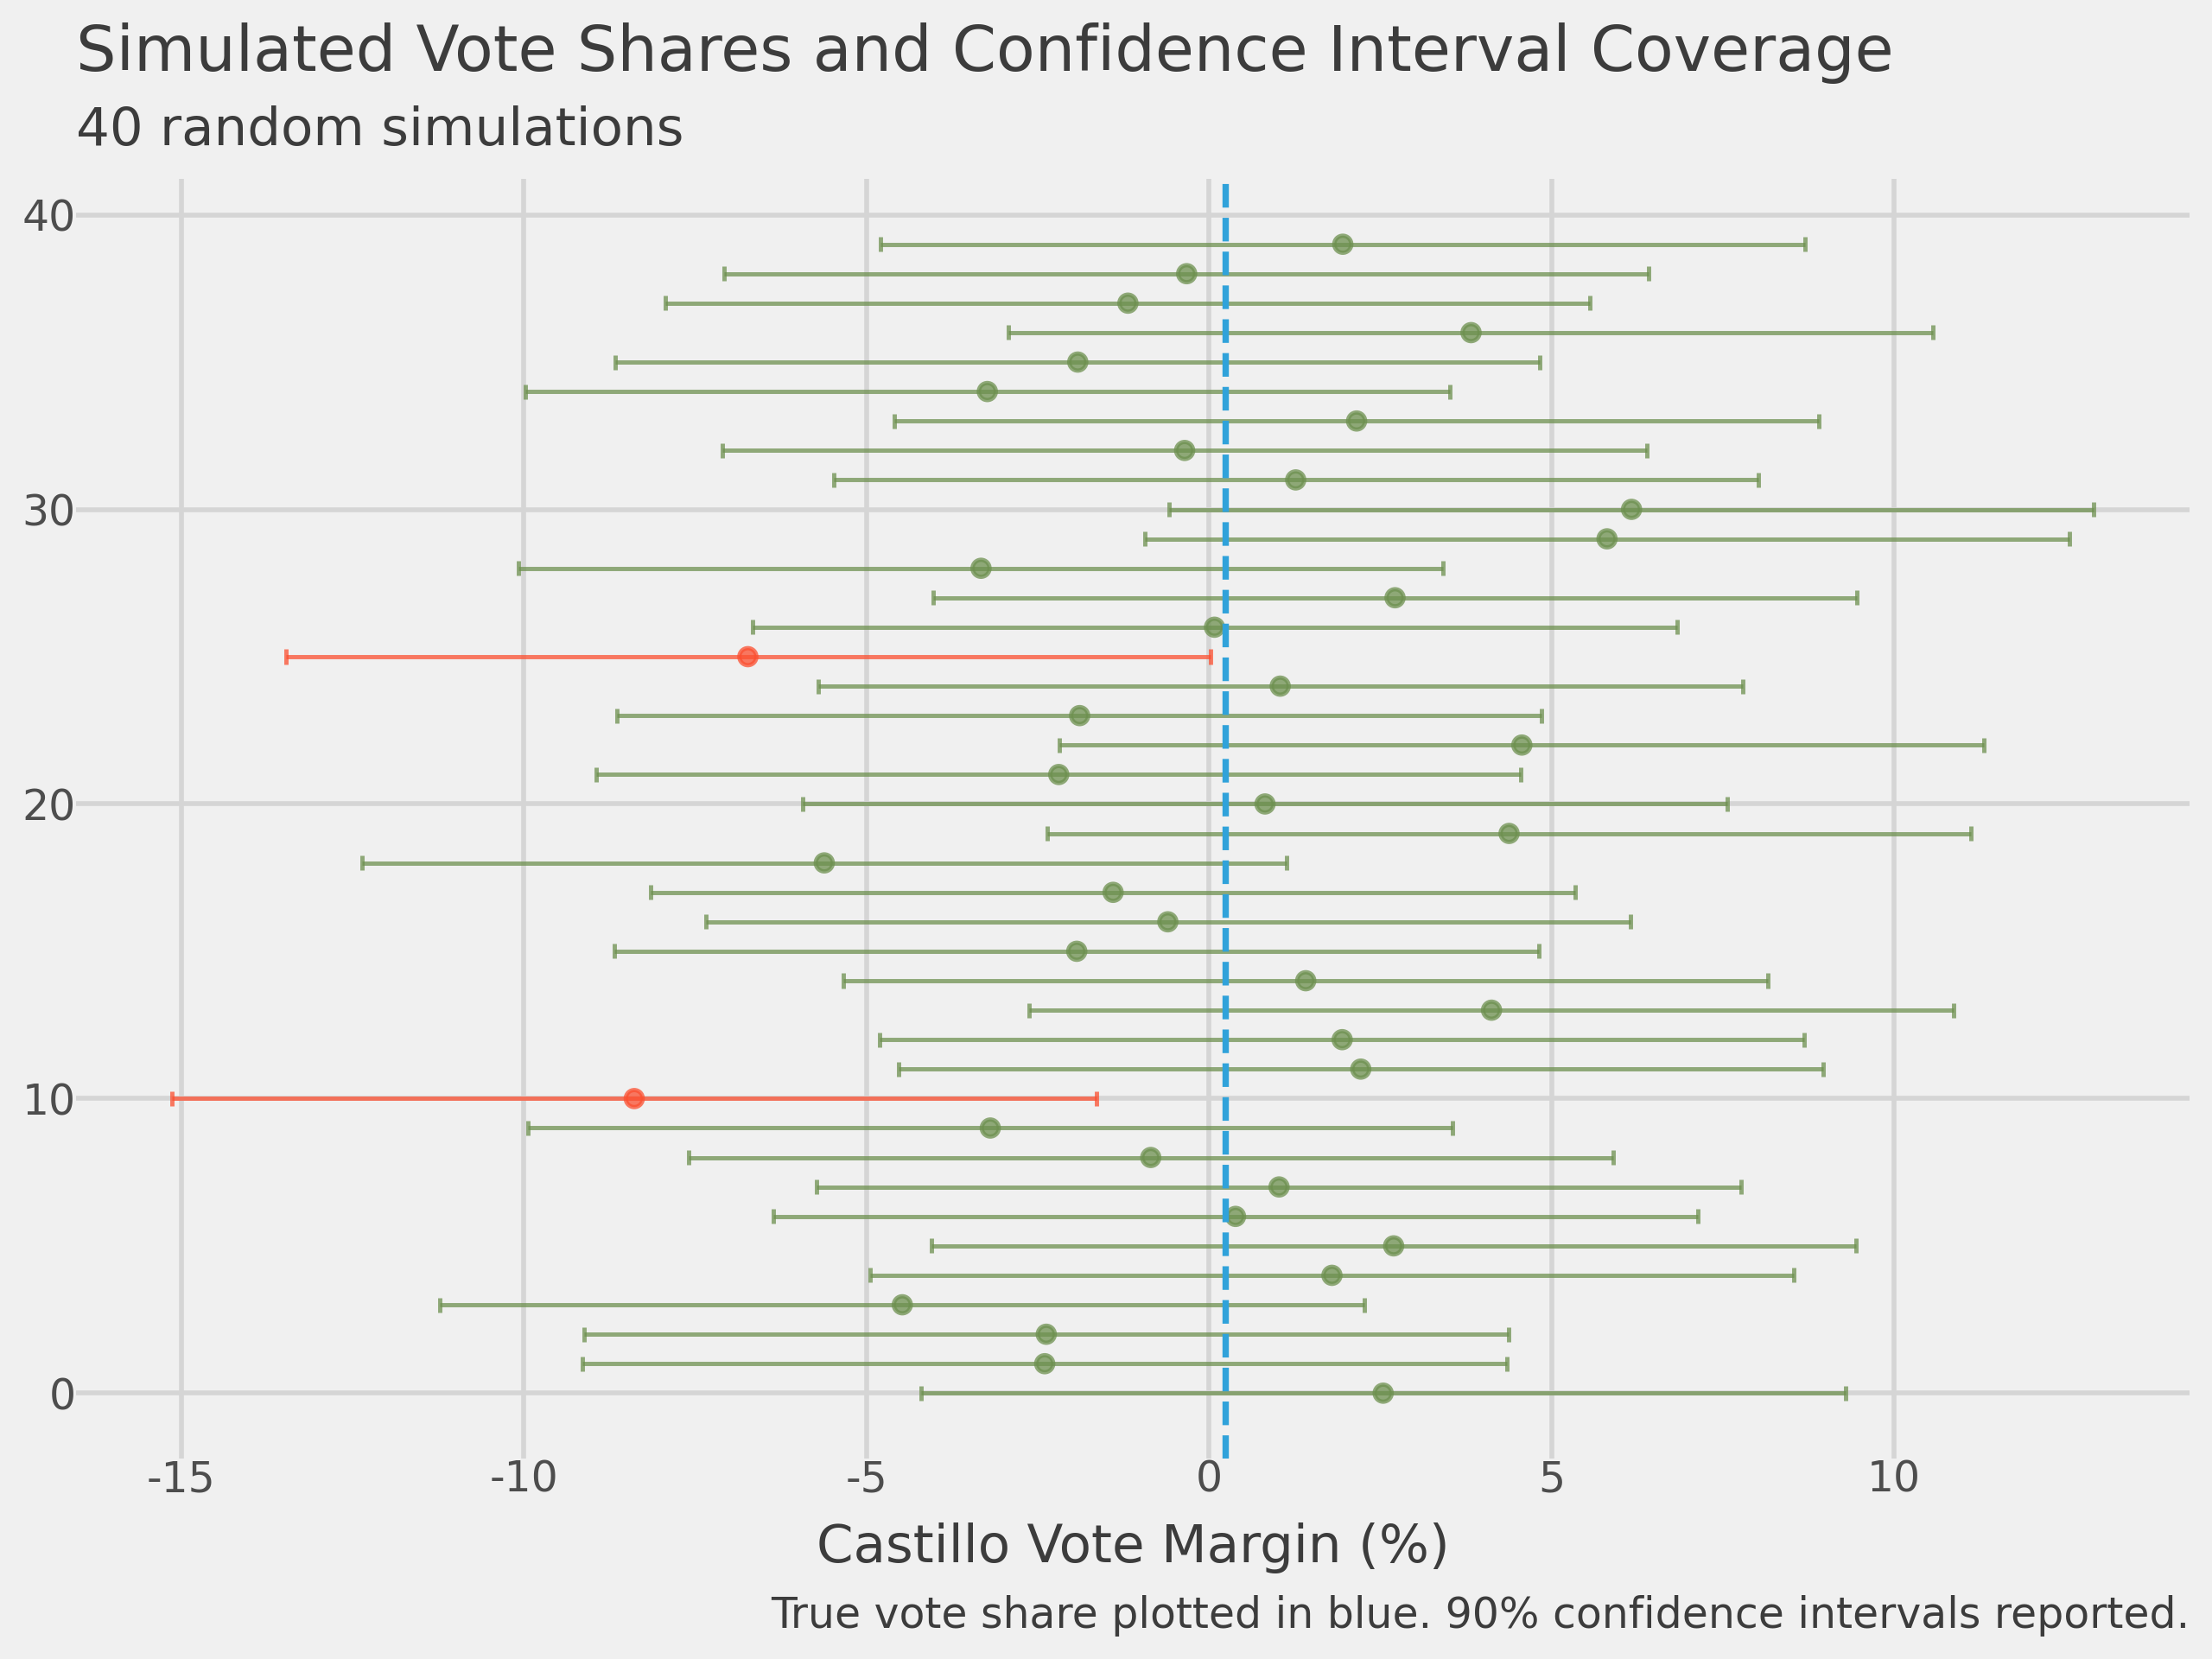

In [26]:
Image('../Solutions/ci_plot.png')

# Problem 6 Recording Your Time Spent on This Problem Set {-}

To help me more efficiently analyze the amount of time the class is spending on problem sets, when you have completed this problem set please record how long you spent working on the problems [here](https://moodle.lse.ac.uk/mod/questionnaire/view.php?id=1809567).

In [9]:
from scipy.stats import binom
! jupyter nbconvert --to html PS3.ipynb --no-prompt

[NbConvertApp] Converting notebook PS3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 702812 bytes to PS3.html
